In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('C:/Users/Lenovo/Downloads/amazon.csv', encoding='latin1')

In [3]:
month_map = {
   'Janeiro': 'January', 'Fevereiro': 'February', 'Março': 'March',
   'Abril': 'April', 'Maio': 'May', 'Junho': 'June',
   'Julho': 'July', 'Agosto': 'August', 'Setembro': 'September',
   'Outubro': 'October', 'Novembro': 'November', 'Dezembro': 'December'
}

df['month'] = df['month'].map(month_map)
df['date'] = pd.to_datetime(df['month'] + ' ' + df['year'].astype(str), format='%B %Y')
df.set_index('date', inplace=True)

In [16]:
df['Month'] = df.index.map(pd.Timestamp.toordinal)

X = df['Month'].values.reshape(-1, 1)
y = df['number']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 37347.68350433537


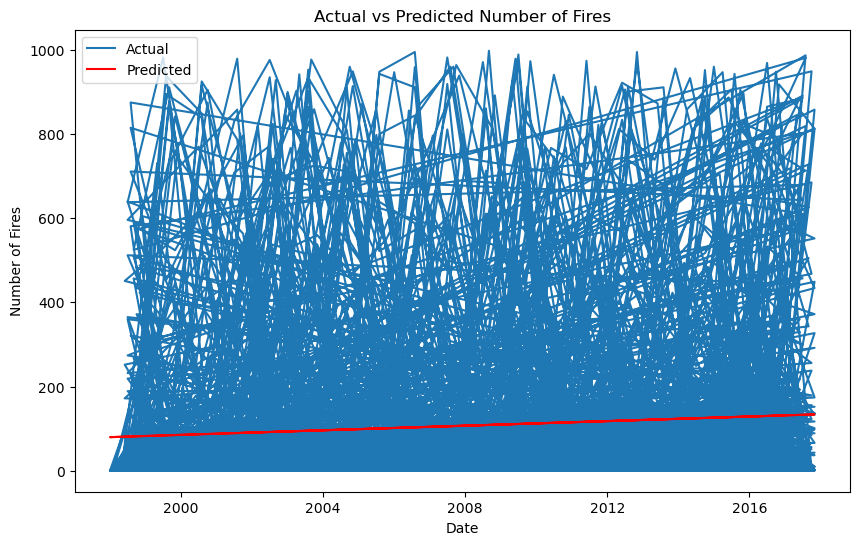

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['number'], label='Actual')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Number of Fires')
plt.xlabel('Date')
plt.ylabel('Number of Fires')
plt.legend()
plt.show()